# 1. Random Numbers

First, we learn a bit about how to get a random number from a distribution.


In [2]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline

To get a random number from the open interval [0,1), we can use `npr.rand`:

In [3]:
npr.rand(1)

array([0.48218836])

In [4]:
npr.rand(10)

array([0.24008844, 0.42422092, 0.99245107, 0.37118349, 0.86099135,
       0.41192432, 0.20368152, 0.11018152, 0.6487936 , 0.21448646])

For standard normal distribution: `npr.randn`. Of course, we can use any distribution. Python supports almost all of them. Please visit this [link](http://docs.scipy.org/doc/numpy/reference/routines.random.html) to research all of them.

In [5]:
npr.randn(10)

array([ 0.46207962,  0.00212439, -0.61691873, -0.42547268,  1.69418532,
       -0.26692555, -0.24576946,  0.17439291, -0.85126086, -0.47665933])

If you wanna provide more details like `mean` and `sd` of the normal distribution:

In [6]:
sample_size = 10
npr.standard_normal(sample_size) # mean = 0, sd = 1

array([-0.97450429,  0.83686217,  0.82244962, -0.79573718, -0.01123614,
       -1.54569113,  0.09775119,  0.63090627, -0.82256081, -0.77329454])

In [7]:
npr.normal(100, 20, sample_size) # mean = 100, sd = 20

array([104.01576106,  77.92105109, 114.24144199, 129.90193649,
        69.81652615,  86.69473777,  80.10722375,  99.79967794,
       108.80770373, 143.94369802])

Now, let's try a more "big" sample size, and plot the distribution.

(array([  2.,   5.,  17.,  28.,  50.,  82., 185., 252., 352., 456., 605.,
        744., 843., 952., 957., 942., 890., 736., 614., 450., 328., 211.,
        133.,  79.,  44.,  14.,  16.,   8.,   2.,   3.]),
 array([-3.551138  , -3.3052009 , -3.0592638 , -2.81332671, -2.56738961,
        -2.32145251, -2.07551542, -1.82957832, -1.58364122, -1.33770413,
        -1.09176703, -0.84582993, -0.59989284, -0.35395574, -0.10801864,
         0.13791845,  0.38385555,  0.62979265,  0.87572974,  1.12166684,
         1.36760394,  1.61354103,  1.85947813,  2.10541523,  2.35135232,
         2.59728942,  2.84322652,  3.08916362,  3.33510071,  3.58103781,
         3.82697491]),
 <a list of 30 Patch objects>)

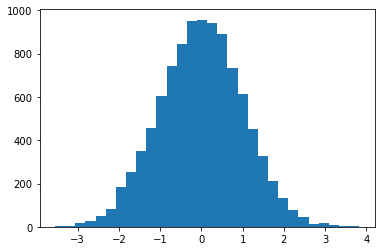

In [11]:
sample_size = 10000
x = npr.standard_normal(sample_size)
plt.hist(x, bins=30)

The next plot is the CDF plot: I borrowed the code from [here](https://stackoverflow.com/questions/24575869/read-file-and-plot-cdf-in-python).

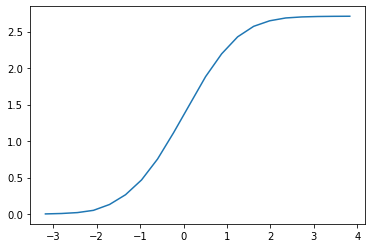

In [12]:
# Choose how many bins you want here
num_bins = 20

# Use the histogram function to bin the data
counts, bin_edges = np.histogram(x, bins=num_bins, normed=True)

# Now find the cdf
cdf = np.cumsum(counts)

# And finally plot the cdf
plt.plot(bin_edges[1:], cdf)

plt.show()

# 1.2 Simulation

[UPDATE SOON]



# 2. BSM formula

To apply the BSM model, the most difficult one is to find out the `N(d1)` and `N(d2)`. Specifically, `N(x)` is the cumulative probability distribution function for a variable `x` with a standard normal distribution. Fortunately, we learn about it above.

To get the CDF of a standard normal distribution, we use a new package namely `scipy`. So we need to install and load it.

In [16]:
from scipy import stats

Then we find the cdf for 0.5 in a standard normal distribution. Guess first!

In [17]:
stats.norm.cdf(0, 0.0, 1.0)

0.5

Then, we apply to get the BSM formula. I borrow a function from [here](https://github.com/yhilpisch/py4fi/blob/master/jupyter36/bsm_functions.py).

In [13]:
def bsm_call_value(S0, K, T, r, sigma):
    ''' Valuation of European call option in BSM model.
    Analytical formula.
    
    Parameters
    ==========
    S0 : float
        initial stock/index level
    K : float
        strike price
    T : float
        maturity date (in year fractions)
    r : float
        constant risk-free short rate
    sigma : float
        volatility factor in diffusion term
    
    Returns
    =======
    value : float
        present value of the European call option
    '''
    from math import log, sqrt, exp
    from scipy import stats

    S0 = float(S0)
    d1 = (log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
    d2 = (log(S0 / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
    value = (S0 * stats.norm.cdf(d1, 0.0, 1.0)
            - K * exp(-r * T) * stats.norm.cdf(d2, 0.0, 1.0))
      # stats.norm.cdf --> cumulative distribution function
      #                    for normal distribution
    return value

In [18]:
# one example: stock price = 20, K = 21, 6-month, r = 12%, and sigma = 0.2
bsm_call_value(20, 21, 0.5, 0.12, 0.2)

1.2361424037891187

In [19]:
# another example: higher current stock price
bsm_call_value(40, 21, 0.5, 0.12, 0.2)

20.22294503015533

In [20]:
# another example: longer maturity
bsm_call_value(20, 21, 2, 0.12, 0.2)

4.24139132909335

As a practice, please write down a similar function to value put option.